<a href="https://colab.research.google.com/github/keithferns98/ImageClassificatin-CNN-/blob/main/ImageClassification(CNN_(cifar10dataset)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [44]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [45]:
X_test.shape

(10000, 32, 32, 3)

In [46]:
y_train.shape

(50000, 1)

In [47]:
y_train[1]

array([9], dtype=uint8)

In [48]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [49]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [50]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


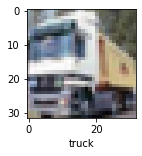

In [51]:
plot_sample(X_train,y_train,1)

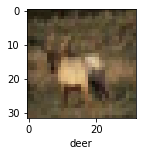

In [52]:
plot_sample(X_train,y_train,3)

In [53]:
#Normalize
X_train=X_train/255   
X_test=X_test/255

In [55]:
 ann=models.Sequential([
     layers.Flatten(input_shape=(32,32,3)),
     layers.Dense(3000,activation='relu'),
     layers.Dense(1000,activation='relu'),
     layers.Dense(10,activation='sigmoid')
     ])
 ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
 ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8098 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6198 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.5393 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4822 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4293 - accuracy: 0.4984


In [56]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 11s 36ms/step - loss: 1.4943 - accuracy: 0.4708


[1.4943351745605469, 0.4708000123500824]

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('Classification Reprt:\n',classification_report(y_test,y_pred_classes))

Classification Reprt:
               precision    recall  f1-score   support

           0       0.64      0.48      0.55      1000
           1       0.62      0.60      0.61      1000
           2       0.46      0.14      0.22      1000
           3       0.40      0.29      0.33      1000
           4       0.35      0.54      0.43      1000
           5       0.44      0.31      0.37      1000
           6       0.57      0.45      0.50      1000
           7       0.32      0.82      0.46      1000
           8       0.62      0.64      0.63      1000
           9       0.69      0.43      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [61]:
cnn=models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [62]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [70]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6241 - accuracy: 0.7833
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.5940 - accuracy: 0.7921
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5685 - accuracy: 0.8003
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5390 - accuracy: 0.8101
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.5151 - accuracy: 0.8192
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4857 - accuracy: 0.8297
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4650 - accuracy: 0.8373
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4378 - accuracy: 0.8451
Epoch 9/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4188 - accuracy: 0.8523
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [71]:
 cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1551 - accuracy: 0.6953


[1.1550999879837036, 0.6952999830245972]

In [72]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [73]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[6.6007866e-05, 1.0443475e-08, 8.2081979e-06, 9.8120499e-01,
        1.2850006e-08, 9.3554314e-03, 2.5384161e-05, 5.2841063e-08,
        9.3395859e-03, 3.3874008e-07],
       [2.8473319e-04, 1.5989214e-02, 1.0989109e-08, 3.4310635e-10,
        3.1820010e-15, 3.2769596e-11, 2.1037765e-11, 4.1124015e-14,
        9.8372078e-01, 5.2403770e-06],
       [7.1508321e-03, 2.0326244e-02, 1.8616907e-05, 2.8399229e-03,
        9.8169903e-06, 9.3585795e-06, 1.3437649e-05, 2.8919869e-06,
        9.6960574e-01, 2.3150516e-05],
       [9.9539930e-01, 3.9873856e-05, 9.2629471e-06, 2.0103050e-06,
        1.7481231e-08, 3.7399230e-09, 5.6978116e-08, 1.2219186e-09,
        4.5486311e-03, 7.8051346e-07],
       [5.6515844e-08, 1.0600264e-06, 4.6940435e-02, 2.5306789e-02,
        3.6477411e-01, 1.0068355e-03, 5.6197011e-01, 4.6891165e-07,
        1.8691904e-09, 7.0686795e-08]], dtype=float32)

In [74]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [75]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

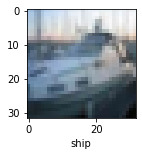

In [83]:
plot_sample(X_test,y_test,2)

In [84]:
classes[y_classes[2]]

'ship'

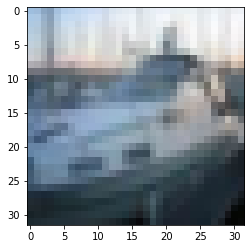

In [85]:
plt.imshow(X_test[2])

In [79]:
y_test[1]

8

In [86]:
print('Classification Report \n',classification_report(y_test,y_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.80      0.82      0.81      1000
           2       0.60      0.58      0.59      1000
           3       0.49      0.58      0.53      1000
           4       0.64      0.66      0.65      1000
           5       0.64      0.53      0.58      1000
           6       0.69      0.83      0.75      1000
           7       0.80      0.70      0.75      1000
           8       0.82      0.78      0.80      1000
           9       0.84      0.70      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [87]:
classes[y_classes[30]]

'frog'

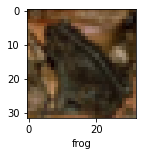

In [88]:
plot_sample(X_test,y_test,30)